#Задание
**Цель:**  
Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.  
**Описание задания:**  
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с [сайта](https://www.kaggle.com/uciml/glass). Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import matplotlib.font_manager
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/feml_data/glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### 2.Проведите первичный анализ.
а) Проверьте количество записей для каждого класса. Сделайте вывод.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
data.Type.unique()

array([1, 2, 3, 5, 6, 7])

все столбцы вещественные, пропусков нет, в таргете 6 видов типа

### 3.Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [ ]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
X = data [['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y = data['Type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.Обучите модель дерева решений RandomForestClassifier на обучающем множестве.


In [ ]:
model_rfc = RandomForestClassifier()

In [ ]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predict_rfc = model_rfc.predict(X_test)

In [ ]:
predict_rfc

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 5, 2, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 2, 2, 7, 1])

### 5.Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_start = accuracy_score(y_test, predict_rfc)

In [ ]:
accuracy_start

0.9069767441860465

In [ ]:
df = pd.DataFrame(columns = ['model', 'accurancy'])
df

,model,accurancy


In [ ]:
df = df.append({
'model' : 'rfc_start',
'accurancy' : accuracy_start
}, ignore_index=True)

df

,model,accurancy
0,rfc_start,0.906977


### 6.Обработайте выбросы в данных.


#### а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?



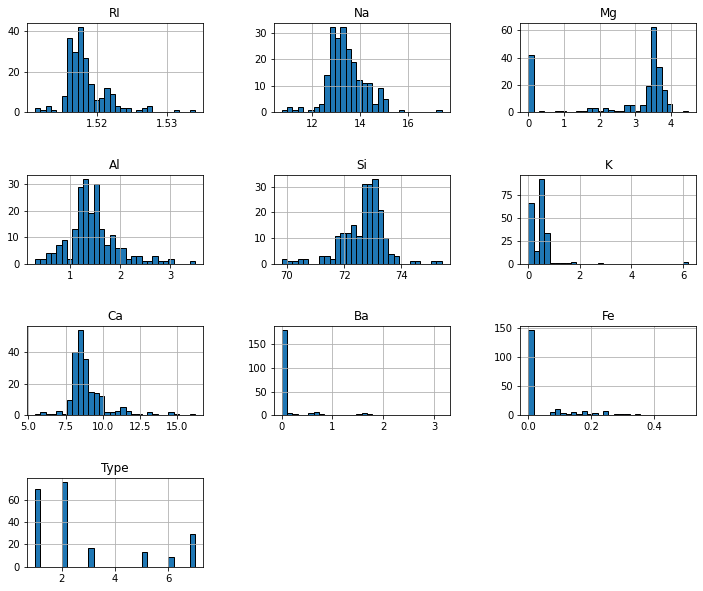

In [ ]:
data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

видим, что у некоторых признкаов распределение, близкое к нормальному

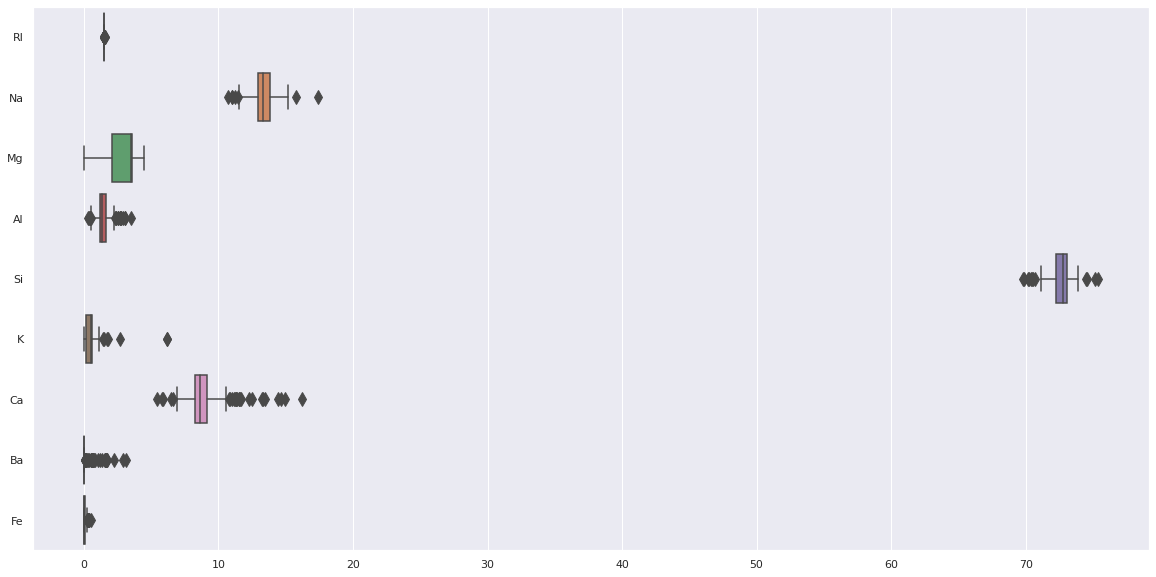

In [ ]:
sns.set(rc={'figure.figsize':( 20 , 10 )})
sns.boxplot(data=X, orient='h', fliersize=10)

видим, что почти у всех признаков имеются выбросы

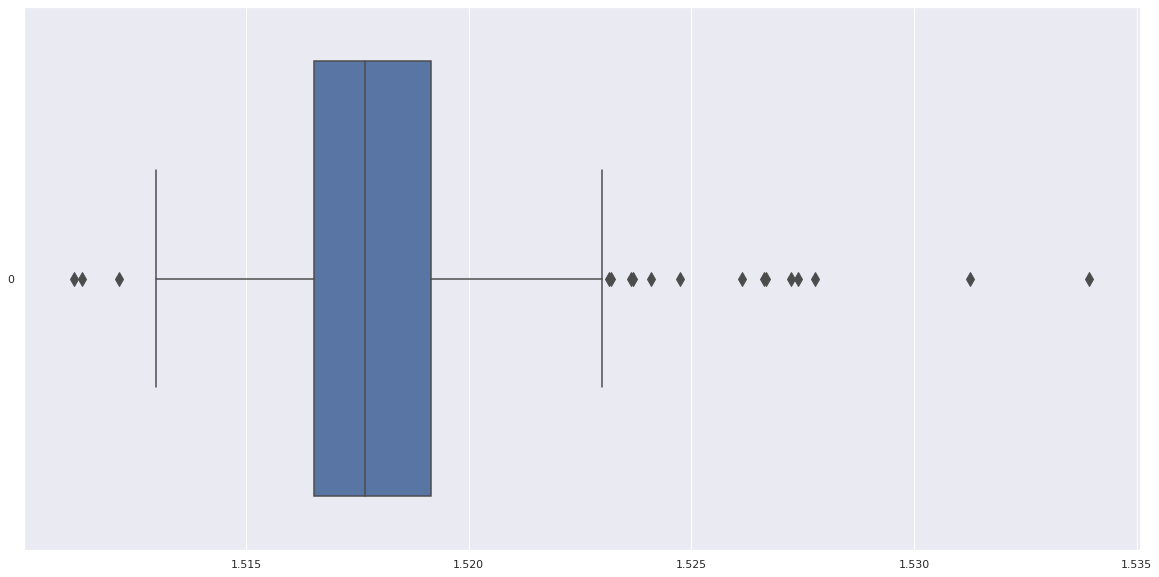

In [ ]:
sns.boxplot(data=X['RI'], orient='h', fliersize=10)

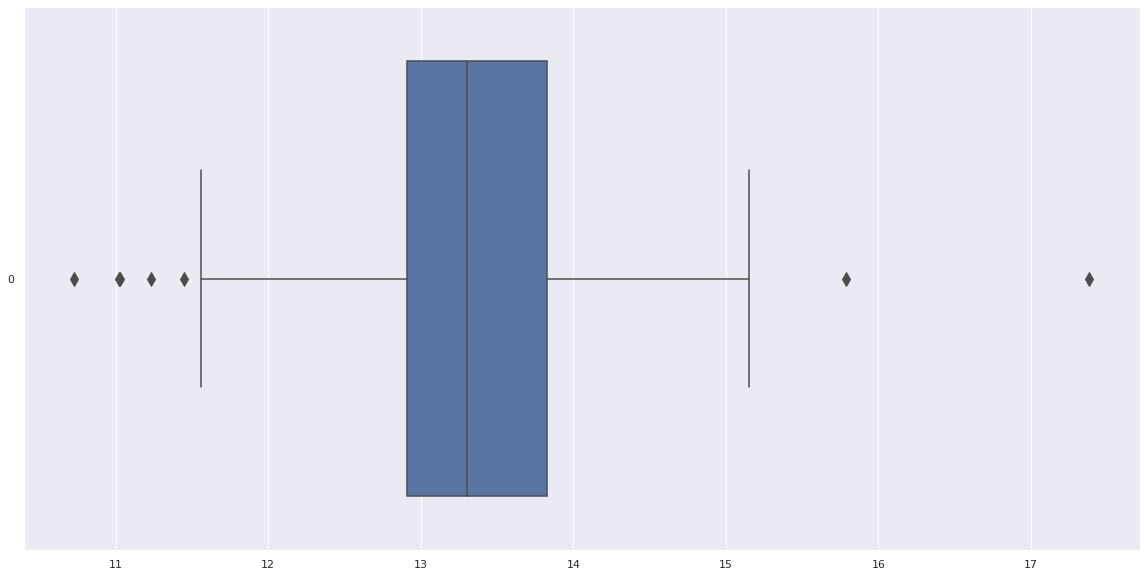

In [ ]:
sns.boxplot(data=X['Na'], orient='h', fliersize=10)

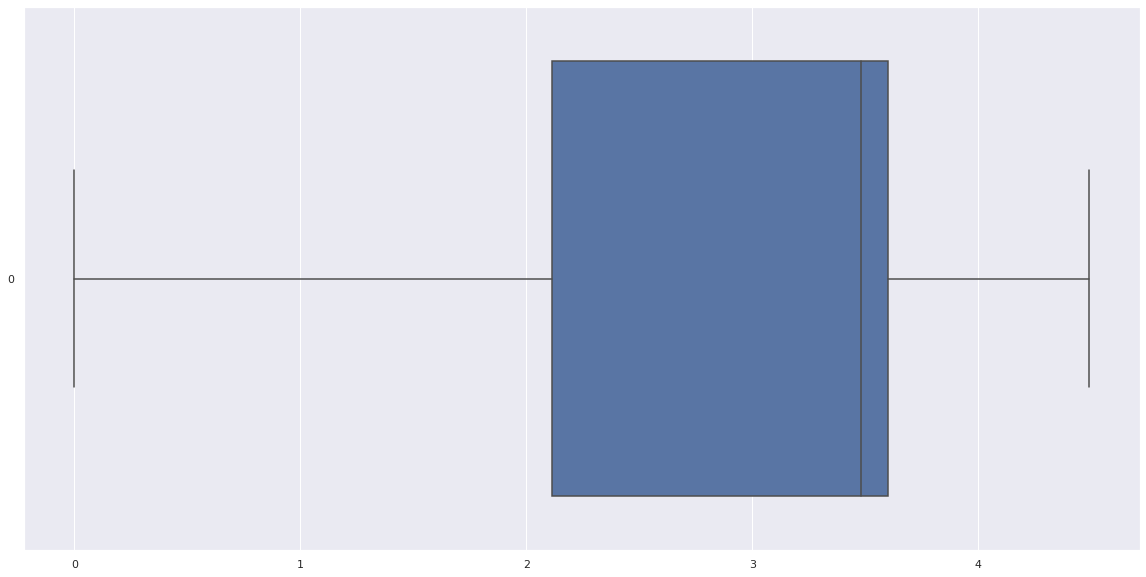

In [ ]:
sns.boxplot(data=X['Mg'], orient='h', fliersize=10)

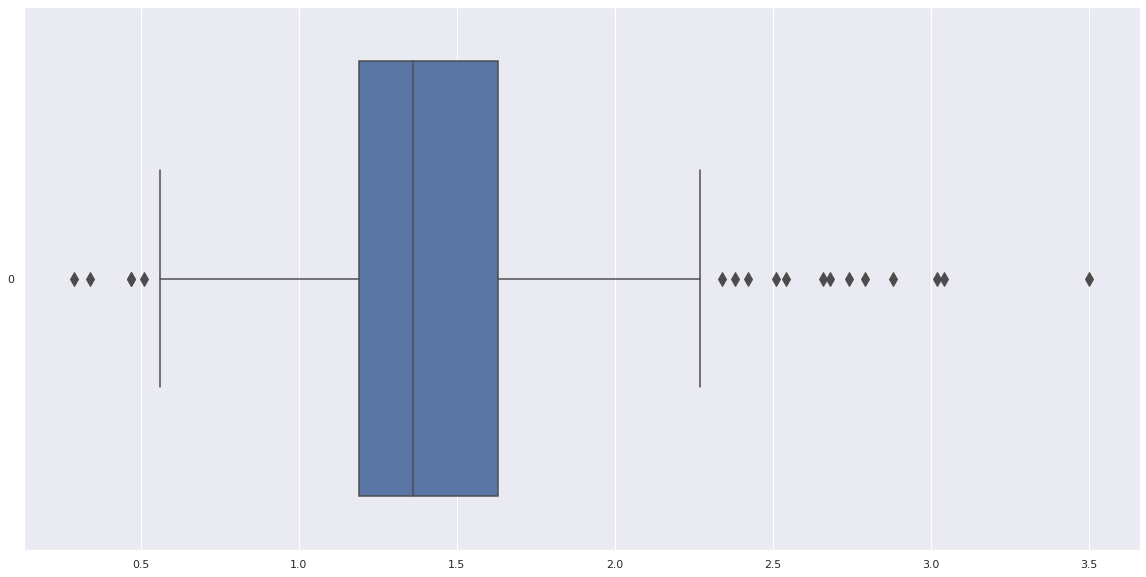

In [ ]:
sns.boxplot(data=X['Al'], orient='h', fliersize=10)

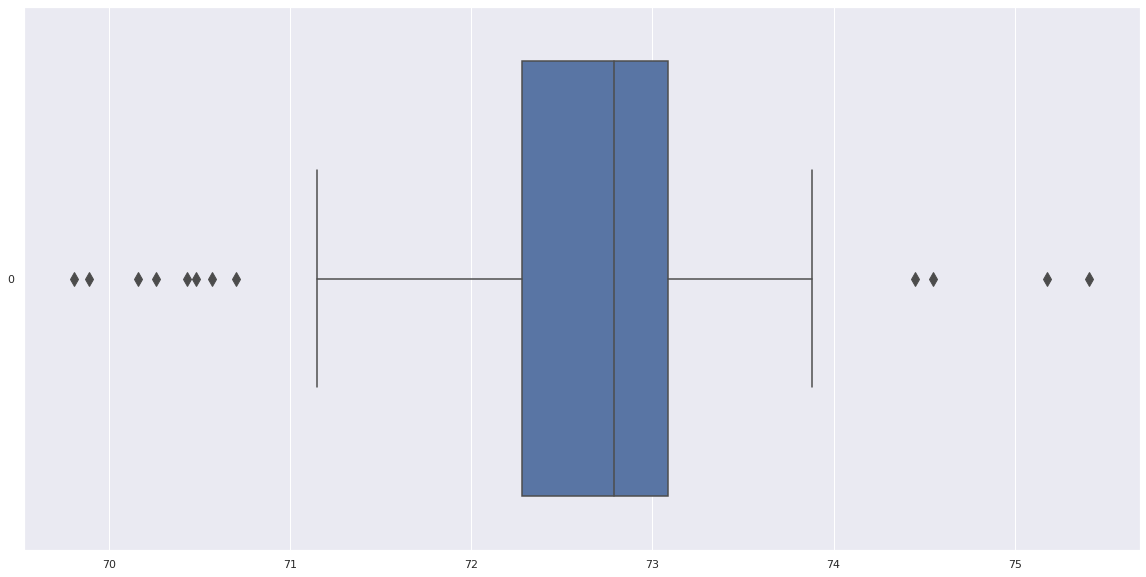

In [ ]:
sns.boxplot(data=X['Si'], orient='h', fliersize=10)

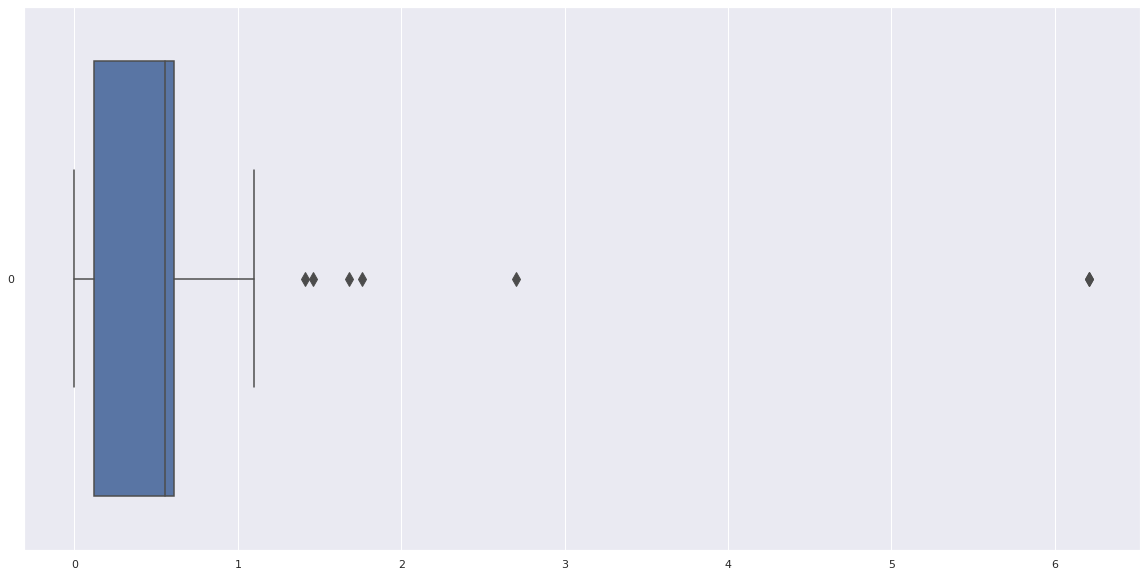

In [ ]:
sns.boxplot(data=X['K'], orient='h', fliersize=10)

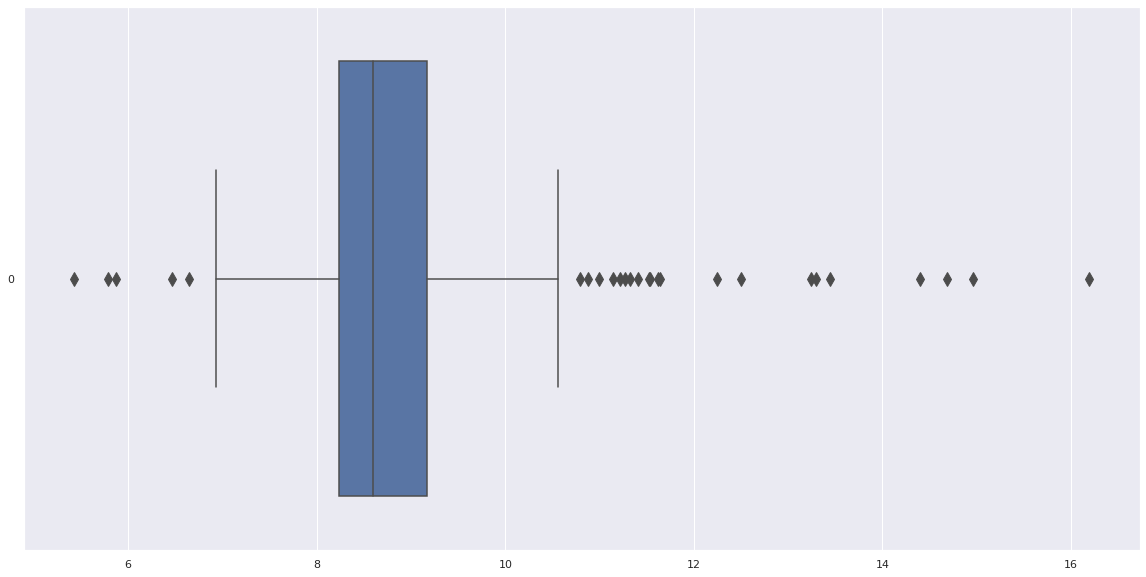

In [ ]:
sns.boxplot(data=X
            ['Ca'], orient='h', fliersize=10)

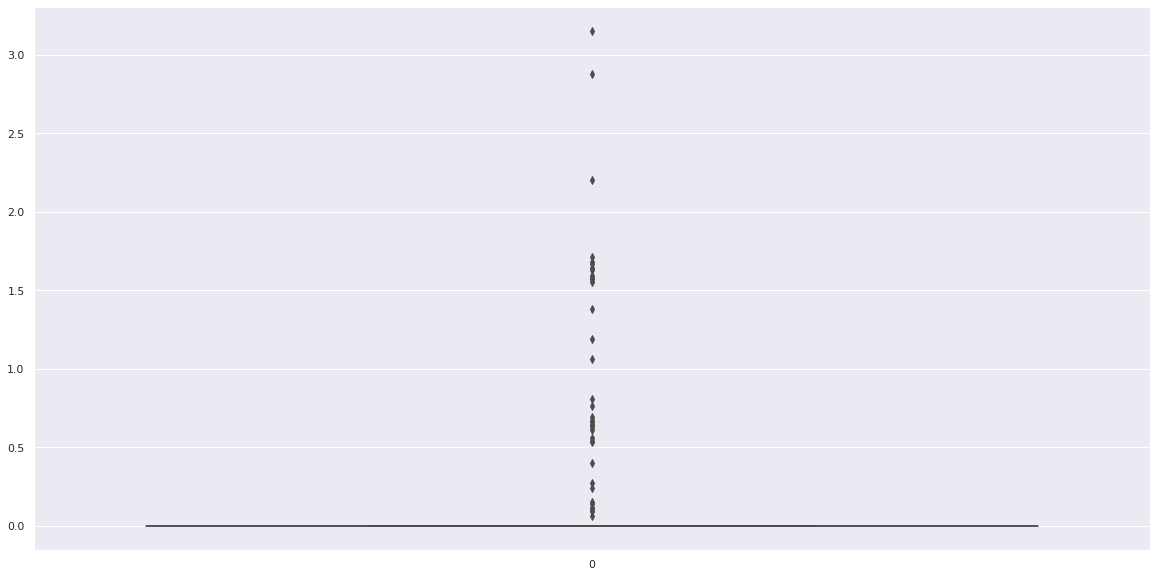

In [ ]:
sns.boxplot(data=X['Ba'], orient='v', fliersize=5)

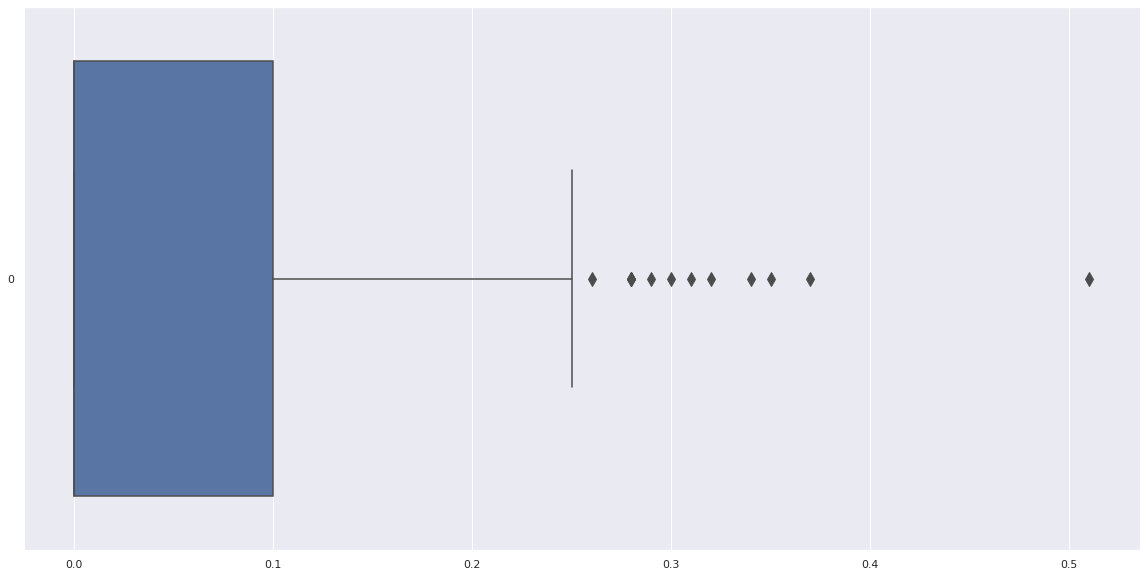

In [ ]:
sns.boxplot(data=X['Fe'], orient='h', fliersize=10)

#### b) Исследуйте признаки на выбросы несколькими способами.


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# берем два столбца у которых данные примерно в одном масштабе
X1 = X[['Ca', 'Na']].to_numpy()

In [ ]:
X1

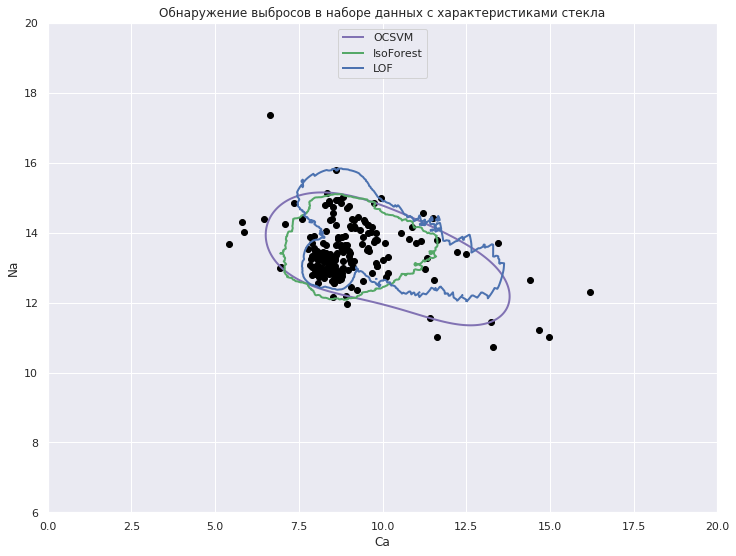

Получаем разделяющую поверхность, где видны выбросы данных


In [ ]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause
classifiers = {
    "OCSVM": OneClassSVM(nu=0.1), # nu - % выбросов
    "IsoForest": IsolationForest(),
    "LOF": LocalOutlierFactor(novelty=True)
}
colors = ['m', 'g', 'b']
legend1 = {}
legend2 = {}


# Выделяем границы обнаружения выбросов с помощью нескольких классификаторов
# метод meshgrid используется для красивой отрисовки
xx1, yy1 = np.meshgrid(np.linspace(0, 20, 500), np.linspace(6, 20, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1, figsize=(12,9))
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Отрисовка результатов (= форма облака точек данных)
plt.figure(1, figsize=(12,9))  # 2 кластера
plt.title("Обнаружение выбросов в наборе данных с характеристиками стекла")
plt.scatter(X1[:, 0], X1[:, 1], color='black')

plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0], legend1_values_list[1].collections[0], legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.ylabel("Na")
plt.xlabel("Ca")
plt.show()
print('Получаем разделяющую поверхность, где видны выбросы данных')

на основе данной визуализации можно принять за вбросы значения Na больше 16 и меньше 12,2
для Ca больше 14 и меньше 7

#### c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [ ]:
X[X['Na'] < 12.2]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00
149,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.00,0.00
165,1.52171,11.56,1.88,1.56,72.86,0.47,11.41,0.00,0.00
166,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.00,0.00
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,0.00


In [ ]:
X[X['Na'] > 16]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
184,1.51115,17.38,0.0,0.34,75.41,0.0,6.65,0.0,0.0


In [ ]:
X[X['Ca'] > 14]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
107,1.53393,12.30,0.0,1.00,70.16,0.12,16.19,0.0,0.24
110,1.52664,11.23,0.0,0.77,73.21,0.00,14.68,0.0,0.00
111,1.52739,11.02,0.0,0.75,73.08,0.00,14.96,0.0,0.00
112,1.52777,12.64,0.0,0.67,72.02,0.06,14.40,0.0,0.00


In [ ]:
X[X['Ca'] < 7]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.0
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.0
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.0
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.0
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.0
186,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.0
207,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0


In [ ]:
# удаление обнаруженных выбросов на основе найденных значений модельным подходом
X = X[(X['Na'] < 16)]
X = X[(X['Na'] > 12.2)]
X = X[(X['Ca'] < 14)]
X = X[(X['Ca'] > 7)]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      196 non-null    float64
 1   Na      196 non-null    float64
 2   Mg      196 non-null    float64
 3   Al      196 non-null    float64
 4   Si      196 non-null    float64
 5   K       196 non-null    float64
 6   Ca      196 non-null    float64
 7   Ba      196 non-null    float64
 8   Fe      196 non-null    float64
dtypes: float64(9)
memory usage: 15.3 KB


было 214, стало 196 строки => удалено около 8.5% данных

### 7.Повторите п. 4, п. 5.


In [ ]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predict_rfc = model_rfc.predict(X_test)

In [ ]:
accuracy_final = accuracy_score(y_test, predict_rfc)

In [ ]:
accuracy_final

0.8604651162790697

In [ ]:
df = df.append({
'model' : 'rfc_final',
'accurancy' : accuracy_final
}, ignore_index=True)

df

,model,accurancy
0,rfc_start,0.906977
1,rfc_final,0.860465


### 8.Сформулируйте выводы по проделанной работе.
а) Кратко опишите, какие преобразования были сделаны с данными.
b) Сравните точность двух моделей.
c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

ВЫВОД:
В работе был загружен датасет и выполнено обучение с помощью RandomForestClassifier,  получена хорошая метрика accurancy
Далее были построены графики для нахождения выбросов, по признакам Ca и Na удалены выбросы, при этом потеря в данных 8%. Снова обучена модель, метрика accurancy ухудшилась. Предполагаю, что из-за того, что данных довольно мало, удаление данных с выбросами нежелательно. Либо же удалено мало выбросов, возможно они были не очень точно обнаружены модельным подходом и нужно было опираться на графики и статистичекие методы.